In [ ]:
setwd("C:/Users/devops/MachineLearningwithR/Day0-Statistics")  #setting work directory (\ does not work on windows so it is replaced with /)

#### Reading CSV, TXT, Excel, and Built-in Datasets 

In [ ]:
#reading CSV is build in
install.packages("readxl") # this package helps to read Excel files

In [ ]:
library("readxl") #importing library

In [ ]:
#read csv
csv_data <- read.csv("usedcars.csv", stringsAsFactors = FALSE)
#view the complete CSV file in a searchable manner
View(csv_data)
#save csv
write.csv(csv_data, file = "saved_csv_data.csv")

In [ ]:
mydata <- read.csv("./movies.csv")
head(mydata)

In [ ]:
mydata[1,] # get first row
head(mydata["Film"]) # get a column with name, head is used to limit the output to only few rows

In [ ]:
# get buildin Datasets
data()

In [ ]:
help(CO2) # help about dataset CO2

In [ ]:
# exporting to text file

m <- matrix(c(1,2,3,4,5,6), nrow = 2, ncol = 3)
m
write(m, file = "matrix_as_text.txt", ncolumns = 3, sep = " ") # write matrix to text file
write.csv(m, file="./matrix.csv", row.names=FALSE)
write.table(m, file="./matrix_table.csv", row.names=FALSE, col.names=FALSE, sep= ",")

In [ ]:
# package needed ot save as Excel
install.packages("xlsx")
library(xlsx)

In [ ]:
write.xlsx(m, file="./matrix_excel.xlsx", row.names=FALSE, col.names=FALSE, sheetName = "sheetX")

#### Save and load R objects

In [ ]:
save(list = c("var1", "var2", "var3", "var4"), file = "vars.RData", safe=TRUE)

In [ ]:
load("./MachineLearningwithR/Day1/mydata.RData")

#### Special functions
#### Exploring and Understanding Data

In [2]:
##data exploration example using used car data
usedcars <- read.csv("usedcars.csv", stringsAsFactors = FALSE)
#get structure of used car data
str(usedcars)

'data.frame':	150 obs. of  6 variables:
 $ year        : int  2011 2011 2011 2011 2012 2010 2011 2010 2011 2010 ...
 $ model       : chr  "SEL" "SEL" "SEL" "SEL" ...
 $ price       : int  21992 20995 19995 17809 17500 17495 17000 16995 16995 16995 ...
 $ mileage     : int  7413 10926 7351 11613 8367 25125 27393 21026 32655 36116 ...
 $ color       : chr  "Yellow" "Gray" "Silver" "Gray" ...
 $ transmission: chr  "AUTO" "AUTO" "AUTO" "AUTO" ...


In [3]:
##Exploring numeric data -----

#summarize numeric variables
summary(usedcars$year)
summary(usedcars[c("price", "mileage")])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2000    2008    2009    2009    2010    2012 

     price          mileage      
 Min.   : 3800   Min.   :  4867  
 1st Qu.:10995   1st Qu.: 27200  
 Median :13592   Median : 36385  
 Mean   :12962   Mean   : 44261  
 3rd Qu.:14904   3rd Qu.: 55125  
 Max.   :21992   Max.   :151479  

In [4]:
#calculate the mean income
(36000 + 44000 + 56000) / 3
mean(c(36000, 44000, 56000))

# the median income
median(c(36000, 44000, 56000))

# the min/max of used car prices
range(usedcars$price)

# the difference of the range
diff(range(usedcars$price))

# IQR for used car prices
IQR(usedcars$price)

# use quantile to calculate five-number summary
quantile(usedcars$price)

# the 99th percentile
quantile(usedcars$price, probs = c(0.01, 0.99))

# quintiles
quantile(usedcars$price, seq(from = 0, to = 1, by = 0.20))

[1] 45333.33

[1] 45333.33

[1] 44000

[1]  3800 21992

[1] 18192

[1] 3909.5

0%     25%     50%     75%    100% 
 3800.0 10995.0 13591.5 14904.5 21992.0

1%      99% 
 5428.69 20505.00

0%     20%     40%     60%     80%    100% 
 3800.0 10759.4 12993.8 13992.0 14999.0 21992.0

In [6]:
# variance and standard deviation of the used car data
var(usedcars$price)
sd(usedcars$price)

[1] 9749892

[1] 3122.482

In [7]:
# one-way tables for the used car data
# table gives occurances of each entry, like 2000 came up 3 time and 2003, one time in the table column year
table(usedcars$year)
table(usedcars$model)
table(usedcars$color)

# compute table proportions
model_table <- table(usedcars$model)
prop.table(model_table)

# round the data
color_table <- table(usedcars$color)
color_pct <- prop.table(color_table) * 100
round(color_pct, digits = 1)


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   3    1    1    1    3    2    6   11   14   42   49   16    1 


 SE SEL SES 
 78  23  49 


 Black   Blue   Gold   Gray  Green    Red Silver  White Yellow 
    35     17      1     16      5     25     32     16      3 


       SE       SEL       SES 
0.5200000 0.1533333 0.3266667 


 Black   Blue   Gold   Gray  Green    Red Silver  White Yellow 
  23.3   11.3    0.7   10.7    3.3   16.7   21.3   10.7    2.0 

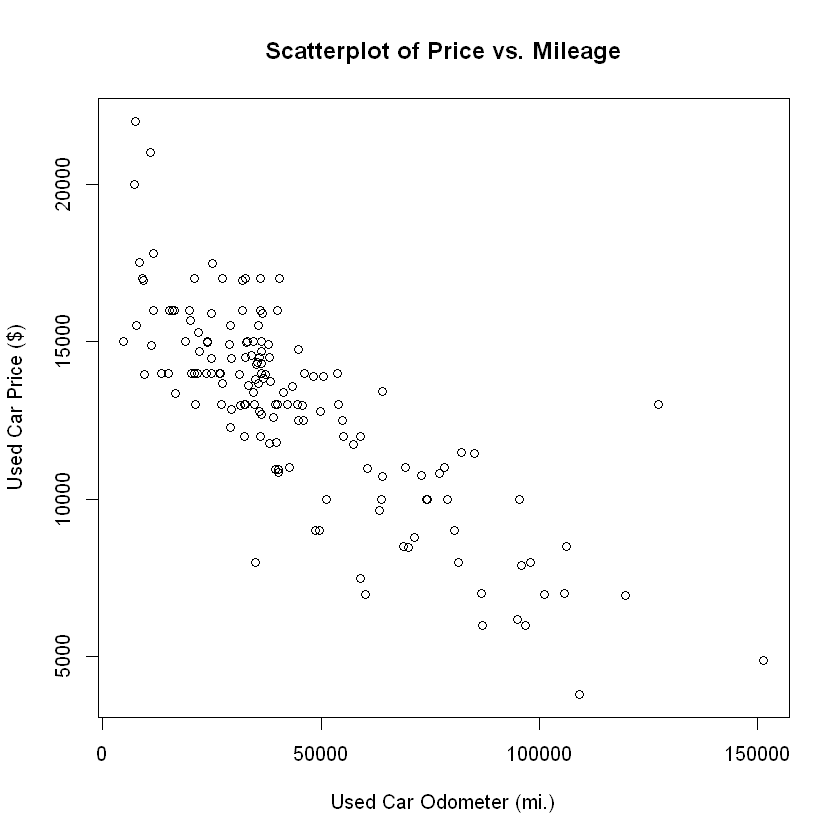

In [8]:
## Exploring relationships between variables -----

# scatterplot of price vs. mileage
plot(x = usedcars$mileage, y = usedcars$price,
     main = "Scatterplot of Price vs. Mileage",
     xlab = "Used Car Odometer (mi.)",
     ylab = "Used Car Price ($)")

##### use par function to setup the number of plaots that should appear on each row
##### this gives 2 plots per row for 2 rows
#### >>>> par(mfrow = c(2, 2)) <<<<

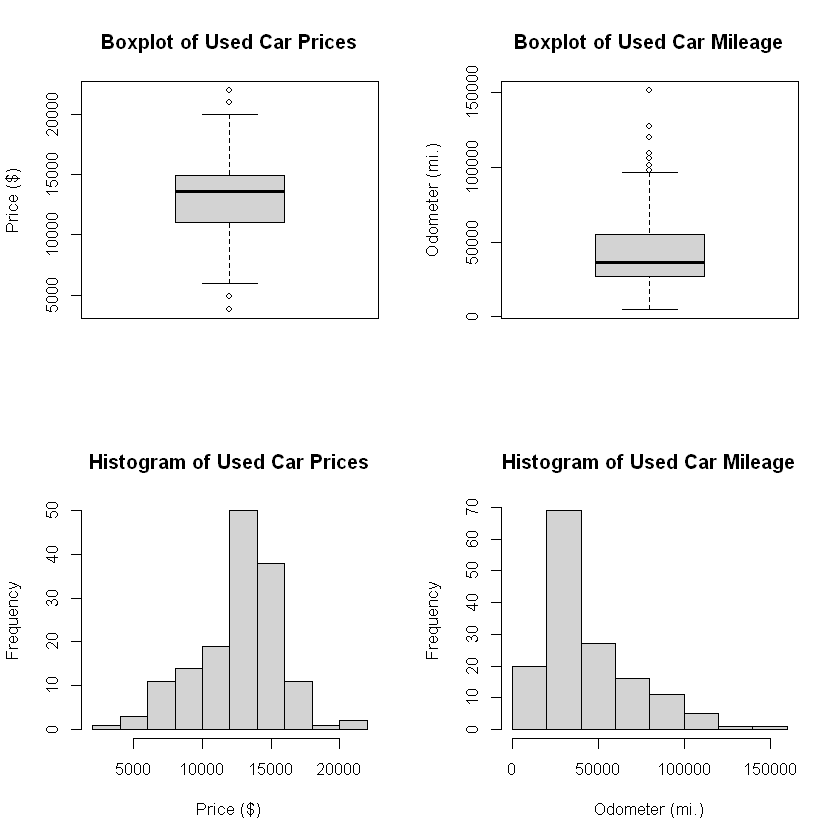

In [18]:
par(mfrow = c(2, 2))

# boxplot of used car prices and mileage
boxplot(usedcars$price, main="Boxplot of Used Car Prices",
        ylab="Price ($)")

boxplot(usedcars$mileage, main="Boxplot of Used Car Mileage",
        ylab="Odometer (mi.)")

# histograms of used car prices and mileage
hist(usedcars$price, main = "Histogram of Used Car Prices",
     xlab = "Price ($)")

hist(usedcars$mileage, main = "Histogram of Used Car Mileage",
     xlab = "Odometer (mi.)")

In [9]:
# new variable indicating conservative colors
usedcars$conservative <-  usedcars$color %in% c("Black", "Gray", "Silver", "White")

# checking our variable
table(usedcars$conservative)


FALSE  TRUE 
   51    99 

In [10]:
install.packages("gmodels")

# Crosstab of conservative by model
library(gmodels)
CrossTable(x = usedcars$model, y = usedcars$conservative)

package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\devops\AppData\Local\Temp\2\RtmpUzAewy\downloaded_packages

 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
               | usedcars$conservative 
usedcars$model |     FALSE |      TRUE | Row Total | 
---------------|-----------|-----------|-----------|
            SE |        27 |        51 |        78 | 
               |     0.009 |     0.004 |           | 
               |     0.346 |     0.654 |     0.520 | 
               |     0.529 |     0.515 |           | 
               |     0.180 |     0.340 |           | 
---------------|-----------|-----------|-----------|
           SEL |         7 |        16 |        23 | 
               |     0.086 |     0.044 |          